In [2]:
import numpy as np 
import pandas as pd 
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

## This Jupyter notebook is for the week 3 peer review assignment for Introduction to Deep Learning. 

## The data is from a Kaggle competition called "Histopathologic Cancer Detection: Identify metastatic tissue in histopathologic scans of lymph node sections".

## Citation: Will Cukierski. Histopathologic Cancer Detection. https://kaggle.com/competitions/histopathologic-cancer-detection, 2018. Kaggle.

## Below is the web address for the GitHub repository that contains my work for this assignment.
## https://github.com/seaocelot/Deep-Learning-Week-3-Colorado-Boulder.git

## I used the following references to help construct the architectures of the two neural networks that I developed. I also used some of the references to help me understand how to use Keras to write the code to construct the neural networks.

## Mohsen Nabil. "Unveiling the Diversity: A Comprehensive Guide to Types of CNN Architectures." *Medium*. October 17, 2023. medium.com/@navarai/unveiling-the-diversity-a-comprehensive-guide-to-types-of-cnn-architectures-9d70da0b4521.

## Victor Zhou. "Keras for Beginners: Implementing a Convolutional Neural Network, A beginner-friendly guide on using Keras to implement a simple Convolutional Neural Network (CNN) in Python." *victorzhou.com blog*. August 8, 2019. Updated November 10, 2020. victorzhou.com/blog/keras-cnn-tutorial/.

## Samhita Alla. "Introduction to Keras, Part One: Data Loading." *Medium*. December 11, 2020. medium.com/towards-data-science/introduction-to-keras-part-one-data-loading-43b9c015e27c#:~:text=The%20data%20has%20to%20be,Dataset%20objects%2C%20and%20Python%20generators.

## Kartik Menon. "Ultimate Guide To Building Powerful Keras Image Classification Models." *simplilearn*. September 17, 2024. simplilearn.com/tutorials/deep-learning-tutorial/guide-to-building-powerful-keras-image-classification-models

## Golnaz Hosseini. "Step-by-Step Tutorial: Image Classification with Keras." *Medium*. May 2, 2023. medium.com/@golnaz.hosseini/step-by-step-tutorial-image-classification-with-keras-7dc423f79a6b.

##  Adrian Rosebrock. "Keras Conv2D and Convolutional Layers." *pyimagesearch*. December 31, 2018. pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/.

## Adrian Rosebrock. "Convolutional Neural Networks (CNNs) and Layer Types." *pyimagesearch*. May 14, 2021. pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/.

## Abhishek Jain. "Deep Learning Architecture 7 : DenseNet." *Medium*. Dec 16, 2024. medium.com/@abhishekjainindore24/deep-learning-architecture-7-densenet-feee44d57f89#:~:text=DenseNet%20architecture%20is%20based%20on,of%20all%20the%20previous%20blocks.

# Project Topic.
## The objective of this deep learning project is to classify images of tissue samples as either being benign or malignant. Different types of neural network architectures and different values of selected hyperparameters will be tested to see how good the predictive power of a neural network can become at predicting whether or not a tissue sample is benign or malignant.

# Data.
## Below a csv file is uploaded from the Kaggle web site that contains the id numbers of tissue samples and their corresponding labels for the train data. The data is uploaded as a pandas dataframe. A column is added to the dataframe that stores the file paths of the tissue samples. The image files are .tif file type.

## It should be noted that I decided to only process a subsection of 30,000 images to make sure that total RAM was not exceeded and to speed up processing.

In [3]:
# define variable for train folder file path that contains .tif files of tissue samples
folder_train = "/kaggle/input/histopathologic-cancer-detection/train" 

# open csv file that contains id numbers of training images and their corresponding labels as pandas dataframe
training_images_labels_df_load = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/train_labels.csv")

# select 30000 samples from train data so that processing is faster
training_images_labels_df = training_images_labels_df_load.iloc[0:30000].copy()

# add column to pandas dataframe that contains file paths for the .tif image files 
training_images_labels_df["file path"] = folder_train + "/" + training_images_labels_df['id'] + ".tif"

# add new column "image open" to pandas dataframe in which .tif files are opened
training_images_labels_df["image open"] = training_images_labels_df["file path"].apply(Image.open)



## Below the width and height of each .tif image file is calculated and two columns, "image width" and "image height" are added to the pandas dataframe.

In [4]:
# add new colum "image width" to pandas dataframe
training_images_labels_df["image width"] = np.nan

for index in range(0, len(training_images_labels_df["image open"])):
    training_images_labels_df.loc[index, "image width"] = training_images_labels_df.loc[index, "image open"].width 

# add new column "image height" to pandas dataframe
training_images_labels_df["image height"] = np.nan

for index in range(0, len(training_images_labels_df["image open"])):
    training_images_labels_df.loc[index, "image height"] = training_images_labels_df.loc[index, "image open"].height 

## Below is the head of the pandas dataframe that contains train data.

In [5]:
training_images_labels_df.head()

,id,label,file path,image open,image width,image height
0,f38a6374c348f90b587e046aac6079959adf3835,0,/kaggle/input/histopathologic-cancer-detection...,<PIL.TiffImagePlugin.TiffImageFile image mode=...,96.0,96.0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1,/kaggle/input/histopathologic-cancer-detection...,<PIL.TiffImagePlugin.TiffImageFile image mode=...,96.0,96.0
2,755db6279dae599ebb4d39a9123cce439965282d,0,/kaggle/input/histopathologic-cancer-detection...,<PIL.TiffImagePlugin.TiffImageFile image mode=...,96.0,96.0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0,/kaggle/input/histopathologic-cancer-detection...,<PIL.TiffImagePlugin.TiffImageFile image mode=...,96.0,96.0
4,068aba587a4950175d04c680d38943fd488d6a9d,0,/kaggle/input/histopathologic-cancer-detection...,<PIL.TiffImagePlugin.TiffImageFile image mode=...,96.0,96.0


## Below is basic information about the pandas dataframe that contains train data.

In [6]:
training_images_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30000 non-null  object 
 1   label         30000 non-null  int64  
 2   file path     30000 non-null  object 
 3   image open    30000 non-null  object 
 4   image width   30000 non-null  float64
 5   image height  30000 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


## The most important things to know about the train data set is that the image files are .tif type and the labels are coded as "0" for benign and "1" for malignant.

# Data Cleaning.
## Below is data cleaning in which Na, NaN, and None values are being searched for. No such values were found.

In [7]:
# print number of Na, NaN, or None values for all columns

for column_name in training_images_labels_df.columns[0:6]:
    print("The number of Na, NaN, or None values in the " + column_name + " column is: " + str(sum(training_images_labels_df[column_name].isna())))

The number of Na, NaN, or None values in the id column is: 0
The number of Na, NaN, or None values in the label column is: 0
The number of Na, NaN, or None values in the file path column is: 0
The number of Na, NaN, or None values in the image open column is: 0
The number of Na, NaN, or None values in the image width column is: 0
The number of Na, NaN, or None values in the image height column is: 0


## Below is data cleaning in which "?" value is searched for. No such values were found.

In [8]:
# print number of ? values in all columns

for column_name in training_images_labels_df.columns[0:6]:
    print("The number of ? values in the " + column_name + " column is: " + str(sum(training_images_labels_df[column_name] == '?')))

The number of ? values in the id column is: 0
The number of ? values in the label column is: 0
The number of ? values in the file path column is: 0
The number of ? values in the image open column is: 0
The number of ? values in the image width column is: 0
The number of ? values in the image height column is: 0


# Exploratory Data Analysis.
## Below is a histogram showing the widths of the images of the train data.

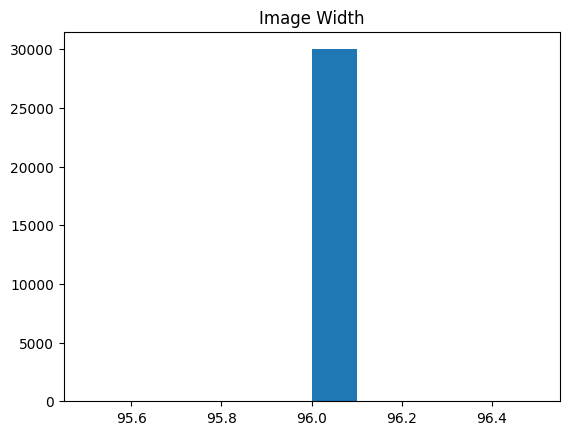

In [9]:
plt.hist(training_images_labels_df['image width'])

plt.title('Image Width')

plt.show()

## Below is a histogram showing the heights of the images of the train data.

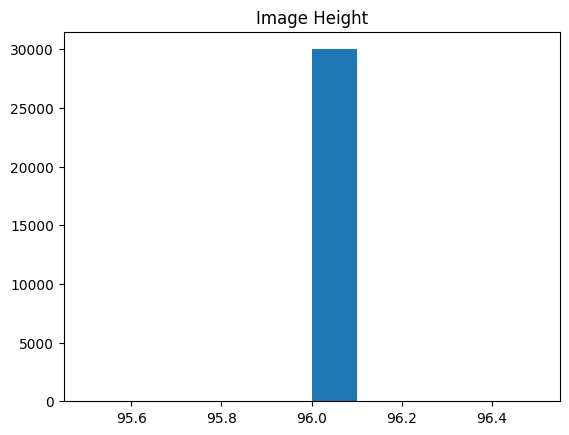

In [10]:
plt.hist(training_images_labels_df['image height'])

plt.title('Image Height')

plt.show()

## When looking at the two histograms of the widths and heights of the images, all images appear to be 96 by 96 in size.

## Below is a histogram showing the distribution of image labels of the train data.

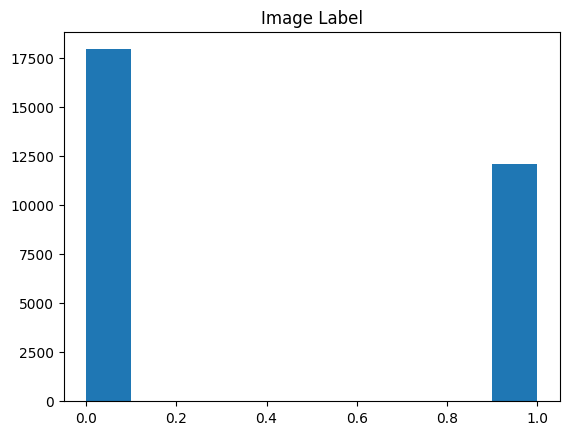

In [11]:
plt.hist(training_images_labels_df['label'])

plt.title('Image Label')

plt.show()

## When looking at the above histogram, there is some imbalance seen in the data in which there is a greater number of benign tissue samples relative to malignant tissue samples.

## After performing the exploratory data analysis, the data appears to be of a form that is considered ready to be fed into a neural network for the purpose of classifying the images as either benign or malignant.

# Model Building and Testing.
## Below image files and labels are converted to arrays. The image arrays are assigned to "x_train" and the label arrays are assigned to "y_train".

In [12]:
# add new column "image array" to pandas dataframe in which opened .tif files are converted to arrays
training_images_labels_df["image array"] = training_images_labels_df["image open"].apply(tf.keras.preprocessing.image.img_to_array)

# convert "image array" column to NumPy array and assign as x_train 
x_train = np.array(training_images_labels_df["image array"].to_list())

# convert "label" column to NumPy array 
label_numpy = np.array(training_images_labels_df["label"].to_list()) 

# convert labels in NumPy array to binary code and assign as y_train 
y_train = label_numpy

## I created two different neural networks to test, each of which has a very distinctive overall architecture from the other. 

## The first neural network, Architecture I, is defined by two segments that are constructed using a convolutional layer, batch normalization layer, dropout layer, and pooling layer. These two segments are followed by a flatten layer to help resize and the data flow, two dense layers, an additional dropout layer, and finally an output layer. There really is not anything special about this architecture. Two convolutional layers are included because they are considered to be effective at detecting distinctive features in images. 

## The second neural network, Architecture II, is defined by an inital convolutional layer that is followed by two dense blocks, each of which is composed of three convolutional layers. In between the two dense blocks is a convolutional layer and a pooling layer. After the two dense blocks, there is a pooling layer, a flatten layer to help resize data flow, and finally an output layer. Architecture II is more complex than architecture I. Since architecture II includes a total of 7 convolutional layers, I am hopeful that it will process the complexity of images more effectively than architecture I. Also, I am hopeful that the incorporation of dense blocks into architecture II should further increase its ability to process the complexity of images.   

## In the Kaggle competition, submissions are evaluated by AUC, the area under the ROC curve. I decided to use this as the performance metric for all of the models.

## Model 1: Architecture I, each of the two convolutional layers has kernel_regularization set at l2 = 0.0001, optimizer = 'adam'

In [5]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = x_train[0].shape

# select type of model 
model = tf.keras.Sequential()

# input layer
model.add(tf.keras.layers.Input(shape=input_dimensions))

# convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), kernel_regularizer = tf.keras.regularizers.l2(0.0001), activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# flatten layers serves to alter shape of output for proper dimensions
model.add(tf.keras.layers.Flatten())

# dense layer
model.add(tf.keras.layers.Dense(12, activation = 'relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# dense layer
model.add(tf.keras.layers.Dense(8, activation = 'relu'))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['auc']
              )

model_output = model.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - auc: 0.5602 - loss: 0.7872 - val_auc: 0.6276 - val_loss: 0.6217
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.5963 - loss: 0.6523 - val_auc: 0.4999 - val_loss: 17.9124
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.5380 - loss: 0.6917 - val_auc: 0.4995 - val_loss: 0.6749
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4976 - loss: 0.6776 - val_auc: 0.5206 - val_loss: 8.3847
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4959 - loss: 0.6801 - val_auc: 0.4437 - val_loss: 3.0239
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4963 - loss: 0.6786 - val_auc: 0.6022 - val_loss: 0.7428
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4959 - loss: 0.6773 - val_auc: 0.5917 - val_loss: 0.7122
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4925 - loss: 0.6772 - val_auc: 0.6730 - val_loss: 2.0876
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━

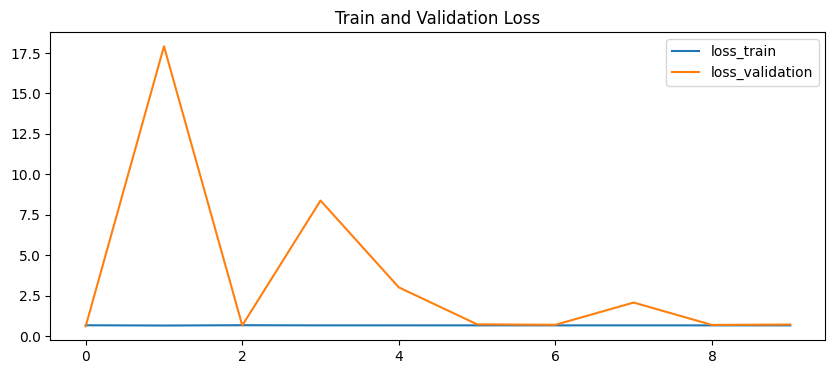

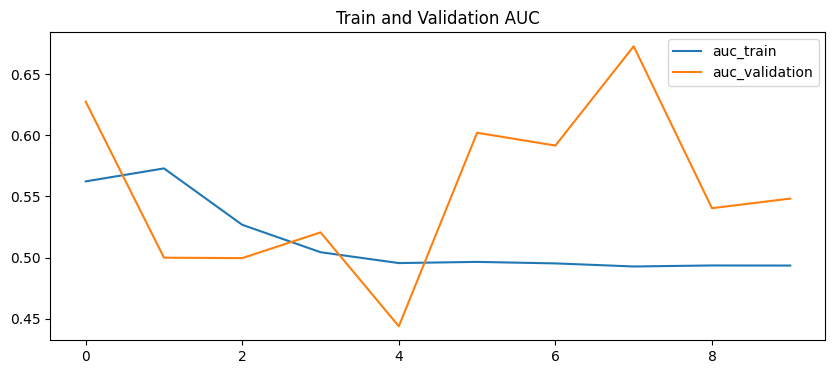

In [6]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['auc'], label = "auc_train")
plt.plot(model_output.history['val_auc'], label = "auc_validation")
plt.legend()
plt.title("Train and Validation AUC")
plt.show()

## Model 2: Architecture I, each of the two convolutional layers has kernel_regularization set at l2 = 0.001, optimizer = 'adam'

In [7]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = x_train[0].shape

# select type of model 
model = tf.keras.Sequential()

# input layer
model.add(tf.keras.layers.Input(shape=input_dimensions))

# convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# flatten layers serves to alter shape of output for proper dimensions
model.add(tf.keras.layers.Flatten())

# dense layer
model.add(tf.keras.layers.Dense(12, activation = 'relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# dense layer
model.add(tf.keras.layers.Dense(8, activation = 'relu'))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['auc']
              )

model_output = model.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - auc: 0.5673 - loss: 0.8211 - val_auc: 0.3880 - val_loss: 1.5056
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4979 - loss: 0.7162 - val_auc: 0.4946 - val_loss: 0.6982
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4965 - loss: 0.6922 - val_auc: 0.5513 - val_loss: 0.9073
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.4957 - loss: 0.6966 - val_auc: 0.4679 - val_loss: 11.7178
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.4979 - loss: 0.6940 - val_auc: 0.4391 - val_loss: 2.2220
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.4958 - loss: 0.6874 - val_auc: 0.4368 - val_loss: 0.9386
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4928 - loss: 0.6855 - val_auc: 0.5151 - val_loss: 1.3908
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.4955 - loss: 0.7030 - val_auc: 0.6301 - val_loss: 1.6197
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━

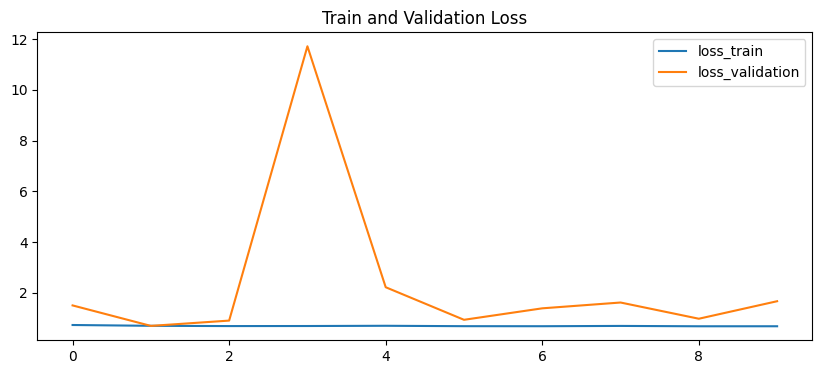

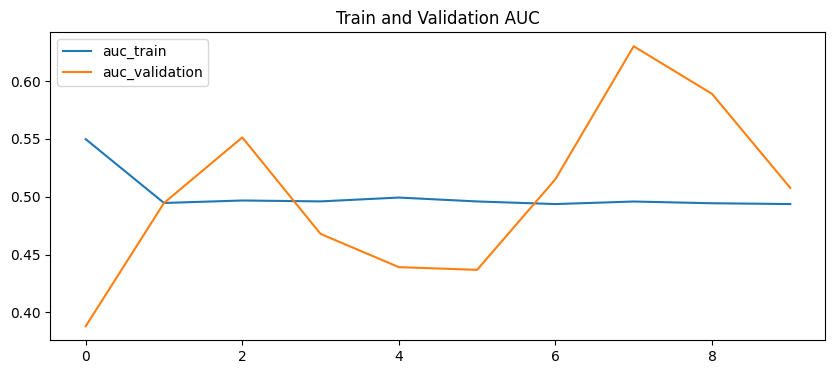

In [8]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['auc'], label = "auc_train")
plt.plot(model_output.history['val_auc'], label = "auc_validation")
plt.legend()
plt.title("Train and Validation AUC")
plt.show()

## Model 3: Architecture I, each of the two convolutional layers has kernel_regularization set at l2 = 0.0001, optimizer = 'SGD'

In [9]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = x_train[0].shape

# select type of model 
model = tf.keras.Sequential()

# input layer
model.add(tf.keras.layers.Input(shape=input_dimensions))

# convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), kernel_regularizer = tf.keras.regularizers.l2(0.0001), activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# flatten layers serves to alter shape of output for proper dimensions
model.add(tf.keras.layers.Flatten())

# dense layer
model.add(tf.keras.layers.Dense(12, activation = 'relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# dense layer
model.add(tf.keras.layers.Dense(8, activation = 'relu'))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['auc']
              )

model_output = model.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - auc: 0.6378 - loss: 0.6674 - val_auc: 0.6736 - val_loss: 1.2880
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.7472 - loss: 0.5694 - val_auc: 0.8356 - val_loss: 0.7734
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.8093 - loss: 0.5139 - val_auc: 0.8502 - val_loss: 1.3391
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.8383 - loss: 0.4725 - val_auc: 0.8560 - val_loss: 1.3422
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.8483 - loss: 0.4606 - val_auc: 0.8542 - val_loss: 1.3197
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.8576 - loss: 0.4456 - val_auc: 0.8357 - val_loss: 1.5457
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8627 - loss: 0.4306 - val_auc: 0.8177 - val_loss: 0.7475
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8686 - loss: 0.4233 - val_auc: 0.8129 - val_loss: 1.7335
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 

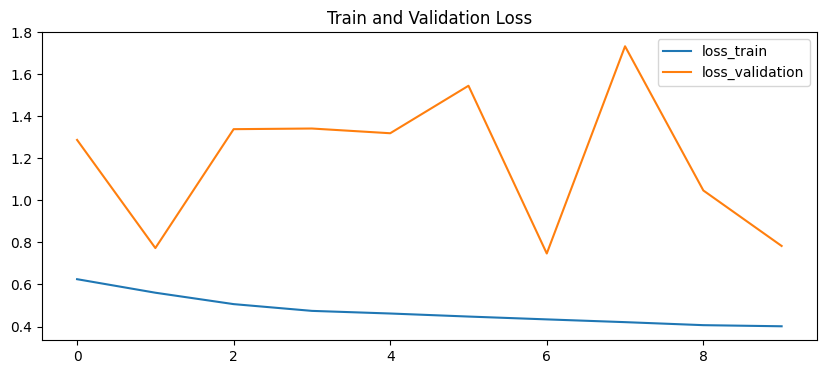

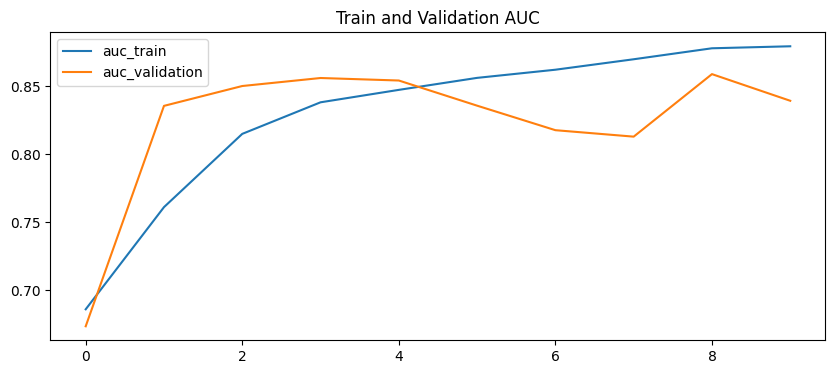

In [10]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['auc'], label = "auc_train")
plt.plot(model_output.history['val_auc'], label = "auc_validation")
plt.legend()
plt.title("Train and Validation AUC")
plt.show()

## Model 4: Architecture I, each of the two convolutional layers has kernel_regularization set at l2 = 0.001, optimizer = 'SGD'

In [11]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = x_train[0].shape

# select type of model 
model = tf.keras.Sequential()

# input layer
model.add(tf.keras.layers.Input(shape=input_dimensions))

# convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# flatten layers serves to alter shape of output for proper dimensions
model.add(tf.keras.layers.Flatten())

# dense layer
model.add(tf.keras.layers.Dense(12, activation = 'relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# dense layer
model.add(tf.keras.layers.Dense(8, activation = 'relu'))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['auc']
              )

model_output = model.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - auc: 0.6316 - loss: 0.6901 - val_auc: 0.8562 - val_loss: 0.5895
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.7092 - loss: 0.6120 - val_auc: 0.7164 - val_loss: 0.6883
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.7394 - loss: 0.5894 - val_auc: 0.8475 - val_loss: 0.5575
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.7596 - loss: 0.5638 - val_auc: 0.8426 - val_loss: 1.1312
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.7683 - loss: 0.5567 - val_auc: 0.8454 - val_loss: 1.2003
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8183 - loss: 0.5114 - val_auc: 0.7852 - val_loss: 1.0044
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8356 - loss: 0.4909 - val_auc: 0.8528 - val_loss: 0.6582
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8406 - loss: 0.4803 - val_auc: 0.8405 - val_loss: 0.6214
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 

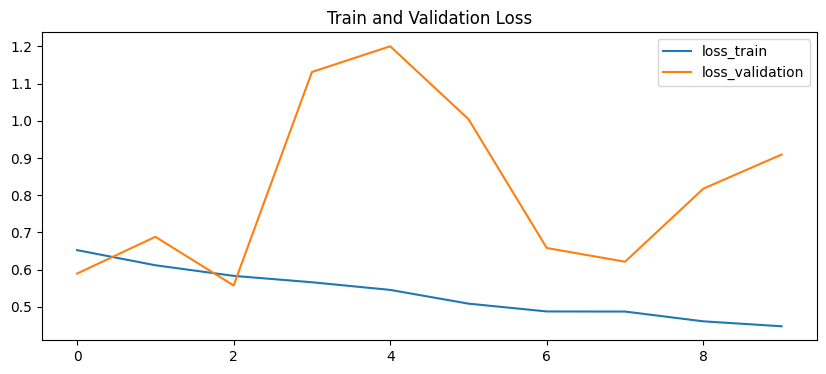

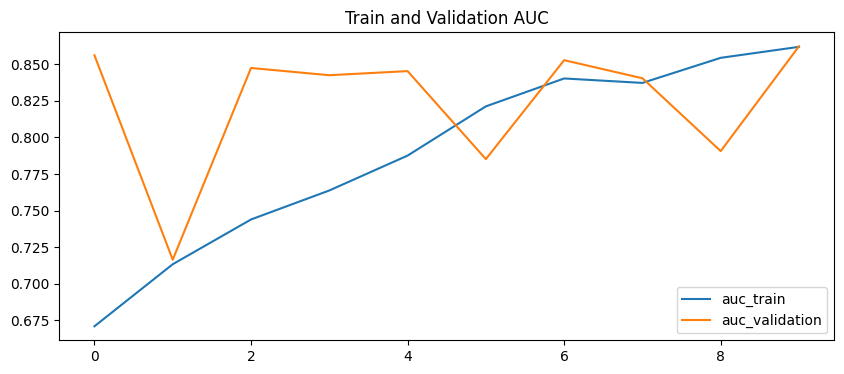

In [12]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['auc'], label = "auc_train")
plt.plot(model_output.history['val_auc'], label = "auc_validation")
plt.legend()
plt.title("Train and Validation AUC")
plt.show()

## Model 5: Architecture II, the convolutional layers within each of the two dense blocks have kernel_regularization set at l2 = 0.0001, optimizer = 'adam'

In [13]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = x_train[0].shape

# input layer
layer_input = tf.keras.layers.Input(shape=input_dimensions)

# convolution layer
layer_conv_1 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(layer_input)

# dense block 1
layer_conv_db_1_a = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), padding = 'same', activation = 'relu')(layer_conv_1)

jelly_1 = tf.keras.layers.Concatenate()([layer_conv_db_1_a, layer_conv_1]) 

layer_conv_db_1_b = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), padding = 'same', activation = 'relu')(jelly_1)

jelly_2 = tf.keras.layers.Concatenate()([layer_conv_db_1_b, jelly_1])

layer_conv_db_1_c = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), activation = 'relu')(jelly_2)

# convolution layer
layer_conv_2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(layer_conv_db_1_c)

# pooling layer
layer_pool_1 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1))(layer_conv_2)

# dense block 2
layer_conv_db_2_a = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), padding = 'same', activation = 'relu')(layer_pool_1)

jelly_1 = tf.keras.layers.Concatenate()([layer_conv_db_2_a, layer_pool_1]) 

layer_conv_db_2_b = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), padding = 'same', activation = 'relu')(jelly_1)

jelly_2 = tf.keras.layers.Concatenate()([layer_conv_db_2_b, jelly_1])

layer_conv_db_2_c = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), activation = 'relu')(jelly_2)

# pooling layer
layer_pool_2 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1))(layer_conv_db_2_c)

# flatten layer
layer_flatten = tf.keras.layers.Flatten()(layer_pool_2)

# output layer
layer_output = tf.keras.layers.Dense(1, activation = 'sigmoid')(layer_flatten)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['auc']
              )

model_output = model.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 72ms/step - auc: 0.5254 - loss: 11.0588 - val_auc: 0.5001 - val_loss: 0.6833
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.4971 - loss: 0.6845 - val_auc: 0.5001 - val_loss: 0.6803
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - auc: 0.4948 - loss: 0.6829 - val_auc: 0.5001 - val_loss: 0.6795
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.4998 - loss: 0.6822 - val_auc: 0.5003 - val_loss: 0.6789
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.4997 - loss: 0.6814 - val_auc: 0.5000 - val_loss: 0.6785
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.4998 - loss: 0.6812 - val_auc: 0.5000 - val_loss: 0.6780
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.4998 - loss: 0.6808 - val_auc: 0.5001 - val_loss: 0.6776
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.5213 - loss: 0.8227 - val_auc: 0.6286 - val_loss: 0.6453
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━

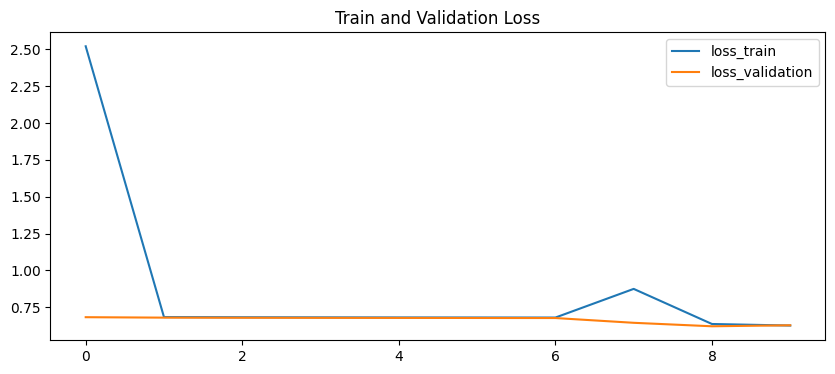

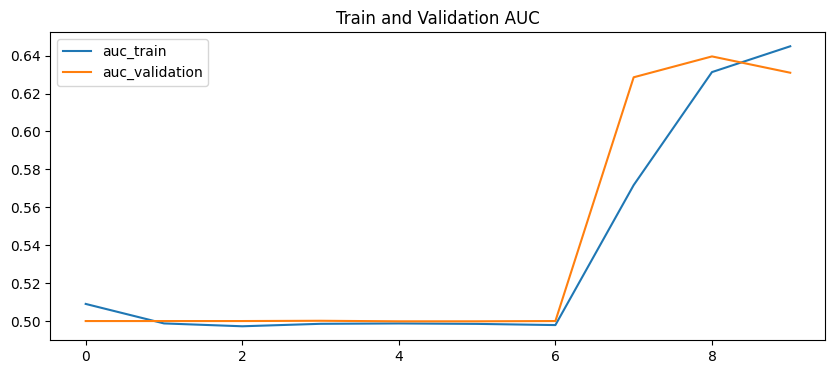

In [14]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['auc'], label = "auc_train")
plt.plot(model_output.history['val_auc'], label = "auc_validation")
plt.legend()
plt.title("Train and Validation AUC")
plt.show()

## Model 6: Architecture II, the convolutional layers within each of the two dense blocks have kernel_regularization set at l2 = 0.001, optimizer = 'adam'

In [15]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input layer
layer_input = tf.keras.layers.Input(shape=input_dimensions)

# convolution layer
layer_conv_1 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(layer_input)

# dense block 1
layer_conv_db_1_a = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), padding = 'same', activation = 'relu')(layer_conv_1)

jelly_1 = tf.keras.layers.Concatenate()([layer_conv_db_1_a, layer_conv_1]) 

layer_conv_db_1_b = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), padding = 'same', activation = 'relu')(jelly_1)

jelly_2 = tf.keras.layers.Concatenate()([layer_conv_db_1_b, jelly_1])

layer_conv_db_1_c = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu')(jelly_2)

# convolution layer
layer_conv_2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(layer_conv_db_1_c)

# pooling layer
layer_pool_1 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1))(layer_conv_2)

# dense block 2
layer_conv_db_2_a = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), padding = 'same', activation = 'relu')(layer_pool_1)

jelly_1 = tf.keras.layers.Concatenate()([layer_conv_db_2_a, layer_pool_1]) 

layer_conv_db_2_b = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), padding = 'same', activation = 'relu')(jelly_1)

jelly_2 = tf.keras.layers.Concatenate()([layer_conv_db_2_b, jelly_1])

layer_conv_db_2_c = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu')(jelly_2)

# pooling layer
layer_pool_2 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1))(layer_conv_db_2_c)

# flatten layer
layer_flatten = tf.keras.layers.Flatten()(layer_pool_2)

# output layer
layer_output = tf.keras.layers.Dense(1, activation = 'sigmoid')(layer_flatten)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['auc']
              )

model_output = model.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 67ms/step - auc: 0.5161 - loss: 11.1410 - val_auc: 0.5000 - val_loss: 0.7491
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - auc: 0.4984 - loss: 0.7474 - val_auc: 0.5000 - val_loss: 0.7362
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - auc: 0.4924 - loss: 0.7370 - val_auc: 0.5000 - val_loss: 0.7291
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - auc: 0.4998 - loss: 0.7306 - val_auc: 0.5000 - val_loss: 0.7239
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.5004 - loss: 0.7271 - val_auc: 0.5000 - val_loss: 0.7212
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.4998 - loss: 0.7228 - val_auc: 0.5000 - val_loss: 0.7165
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.4998 - loss: 0.7183 - val_auc: 0.5000 - val_loss: 0.7122
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.4998 - loss: 0.7140 - val_auc: 0.5000 - val_loss: 0.7079
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━

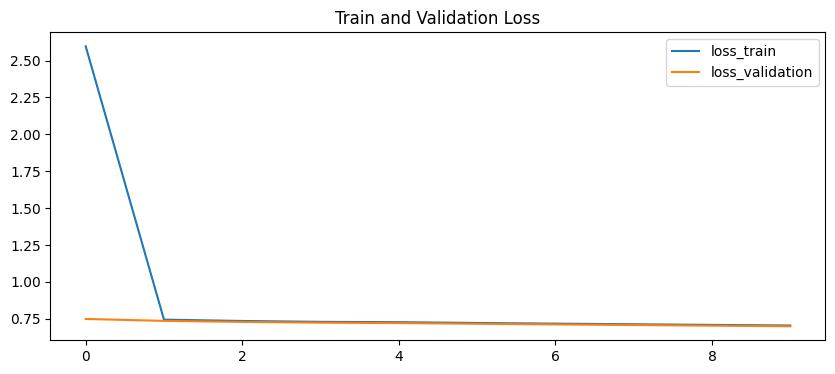

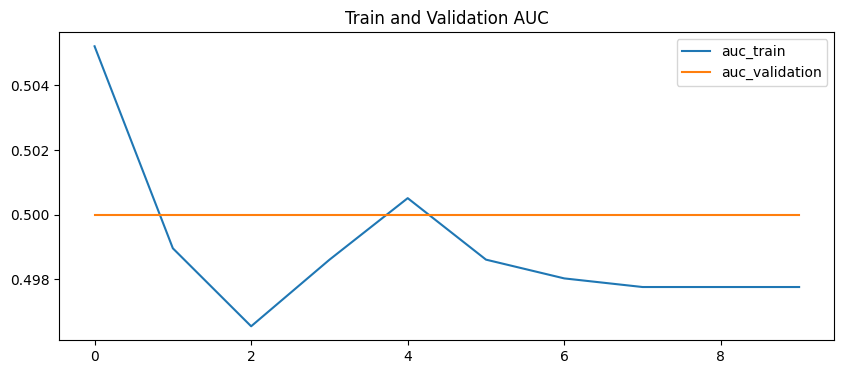

In [16]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['auc'], label = "auc_train")
plt.plot(model_output.history['val_auc'], label = "auc_validation")
plt.legend()
plt.title("Train and Validation AUC")
plt.show()

## Model 7: Architecture II, the convolutional layers within each of the two dense blocks have kernel_regularization set at l2 = 0.0001, optimizer = 'SGD'

In [17]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input layer
layer_input = tf.keras.layers.Input(shape=input_dimensions)

# convolution layer
layer_conv_1 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(layer_input)

# dense block 1
layer_conv_db_1_a = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), padding = 'same', activation = 'relu')(layer_conv_1)

jelly_1 = tf.keras.layers.Concatenate()([layer_conv_db_1_a, layer_conv_1]) 

layer_conv_db_1_b = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), padding = 'same', activation = 'relu')(jelly_1)

jelly_2 = tf.keras.layers.Concatenate()([layer_conv_db_1_b, jelly_1])

layer_conv_db_1_c = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), activation = 'relu')(jelly_2)

# convolution layer
layer_conv_2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(layer_conv_db_1_c)

# pooling layer
layer_pool_1 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1))(layer_conv_2)

# dense block 2
layer_conv_db_2_a = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), padding = 'same', activation = 'relu')(layer_pool_1)

jelly_1 = tf.keras.layers.Concatenate()([layer_conv_db_2_a, layer_pool_1]) 

layer_conv_db_2_b = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), padding = 'same', activation = 'relu')(jelly_1)

jelly_2 = tf.keras.layers.Concatenate()([layer_conv_db_2_b, jelly_1])

layer_conv_db_2_c = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.0001), activation = 'relu')(jelly_2)

# pooling layer
layer_pool_2 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1))(layer_conv_db_2_c)

# flatten layer
layer_flatten = tf.keras.layers.Flatten()(layer_pool_2)

# output layer
layer_output = tf.keras.layers.Dense(1, activation = 'sigmoid')(layer_flatten)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['auc']
              )

model_output = model.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - auc: 0.5012 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_au

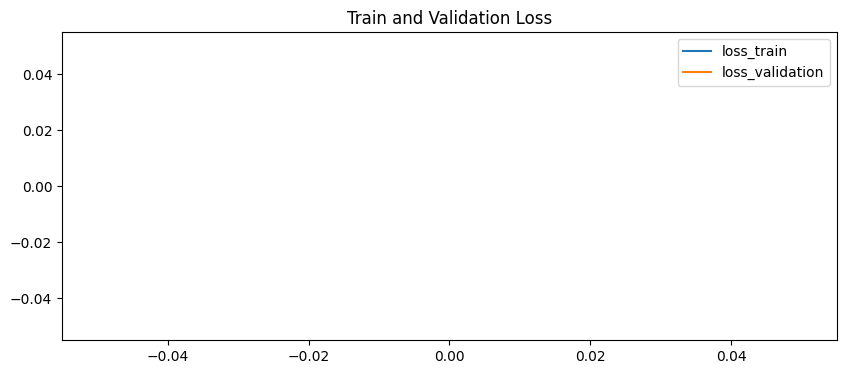

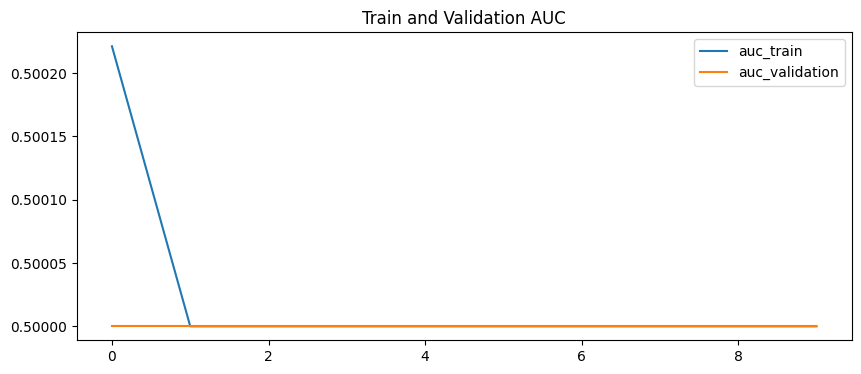

In [18]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['auc'], label = "auc_train")
plt.plot(model_output.history['val_auc'], label = "auc_validation")
plt.legend()
plt.title("Train and Validation AUC")
plt.show()

## Model 8: Architecture II, the convolutional layers within each of the two dense blocks have kernel_regularization set at l2 = 0.001, optimizer = 'SGD'

In [19]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# input layer
layer_input = tf.keras.layers.Input(shape=input_dimensions)

# convolution layer
layer_conv_1 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(layer_input)

# dense block 1
layer_conv_db_1_a = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), padding = 'same', activation = 'relu')(layer_conv_1)

jelly_1 = tf.keras.layers.Concatenate()([layer_conv_db_1_a, layer_conv_1]) 

layer_conv_db_1_b = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), padding = 'same', activation = 'relu')(jelly_1)

jelly_2 = tf.keras.layers.Concatenate()([layer_conv_db_1_b, jelly_1])

layer_conv_db_1_c = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu')(jelly_2)

# convolution layer
layer_conv_2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(layer_conv_db_1_c)

# pooling layer
layer_pool_1 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1))(layer_conv_2)

# dense block 2
layer_conv_db_2_a = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), padding = 'same', activation = 'relu')(layer_pool_1)

jelly_1 = tf.keras.layers.Concatenate()([layer_conv_db_2_a, layer_pool_1]) 

layer_conv_db_2_b = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), padding = 'same', activation = 'relu')(jelly_1)

jelly_2 = tf.keras.layers.Concatenate()([layer_conv_db_2_b, jelly_1])

layer_conv_db_2_c = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu')(jelly_2)

# pooling layer
layer_pool_2 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1))(layer_conv_db_2_c)

# flatten layer
layer_flatten = tf.keras.layers.Flatten()(layer_pool_2)

# output layer
layer_output = tf.keras.layers.Dense(1, activation = 'sigmoid')(layer_flatten)

model = tf.keras.Model(inputs = layer_input, outputs = layer_output)

model.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['auc']
              )

model_output = model.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - auc: 0.5012 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_auc: 0.5000 - val_loss: nan
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - auc: 0.5000 - loss: nan - val_au

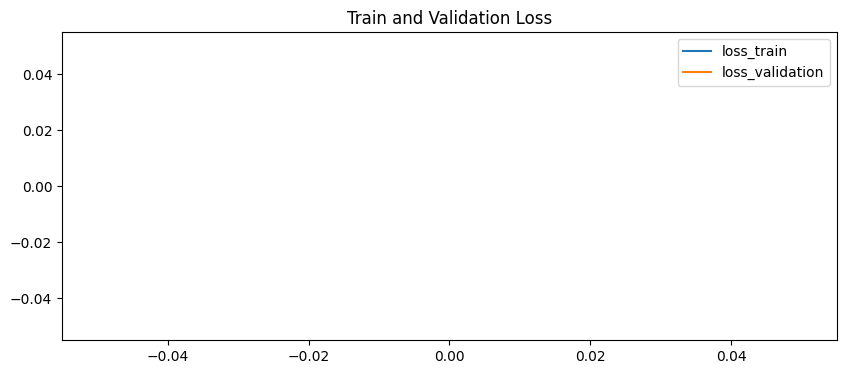

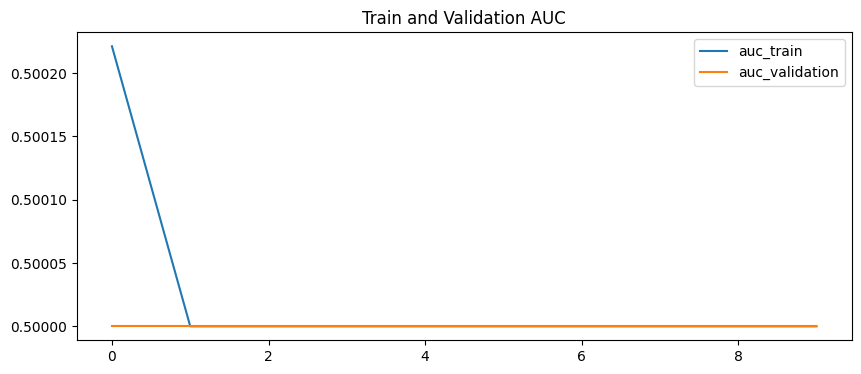

In [20]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['auc'], label = "auc_train")
plt.plot(model_output.history['val_auc'], label = "auc_validation")
plt.legend()
plt.title("Train and Validation AUC")
plt.show()

# Results and Analysis.

## Below is a table that summarizes the results of the 8 different models.

In [13]:
# organize data for table
data_for_table = [["1", "Architecture I, l2 = 0.0001, Adam", '8', '0.6730'], ["2", "Architecture I, l2 = 0.001, Adam", '8', '0.6301'], ["3", "Architecture I, l2 = 0.0001, SGD", '9', '0.8589'], ["4", "Architecture I, l2 = 0.001, SGD", '10', '0.8623'], ["5", "Architecture II, l2 = 0.0001, Adam", '9', '0.6395'], ["6", "Architecture II, l2 = 0.001, Adam", '1-10', '0.5000'], ["7", "Architecture II, l2 = 0.0001, SGD", '1-10', '0.5000'], ["8", "Architecture II, l2 = 0.001, SGD", '1-10', '0.5000']]

# create data table
table_summary_models = pd.DataFrame(data_for_table, columns = ["Model #", "Model Type", "Epoch #", "AUC"])

# display table
pd.set_option('display.max_colwidth', None)

table_summary_models

,Model #,Model Type,Epoch #,AUC
0,1,"Architecture I, l2 = 0.0001, Adam",8,0.6730
1,2,"Architecture I, l2 = 0.001, Adam",8,0.6301
2,3,"Architecture I, l2 = 0.0001, SGD",9,0.8589
3,4,"Architecture I, l2 = 0.001, SGD",10,0.8623
4,5,"Architecture II, l2 = 0.0001, Adam",9,0.6395
5,6,"Architecture II, l2 = 0.001, Adam",1-10,0.5000
6,7,"Architecture II, l2 = 0.0001, SGD",1-10,0.5000
7,8,"Architecture II, l2 = 0.001, SGD",1-10,0.5000


## When looking over the results of the 8 different models that were run, model #3 and model #4 gave the best performances. Each of these models used architecture I and SGD as the optimizer. The different values of kernel regularizer that were used for the first 4 models that all used architecture 1 do not appear to have impacted the results in a significant way.

## It is important to note that model #7 and model #8 generated "nan" values for all of the loss values. Both model #7 and model #8 used architecture II and the optimizer SGD. I am not sure why both of these models produced "nan" values for all of the loss values. 


## When looking over the results of the eight different models, model #4 is considered to have the best performance because it gave the highest AUC value of 0.8623 at epoch number 10. Model #4 is run again below. The model is run for 10 epochs. The test data is then fed into the trained model and the predicted values for the labels are generated.

In [22]:
# neural network for model # 4

# set up neural network model
tf.keras.utils.set_random_seed(496)

# input dimensions
input_dimensions = x_train[0].shape

# select type of model 
model_4 = tf.keras.Sequential()

# input layer
model_4.add(tf.keras.layers.Input(shape=input_dimensions))

# convolutional layer
model_4.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu'))

# batch normalization layer
model_4.add(tf.keras.layers.BatchNormalization())

# dropout layer
model_4.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model_4.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# convolutional layer
model_4.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), kernel_regularizer = tf.keras.regularizers.l2(0.001), activation = 'relu'))

# batch normalization layer
model_4.add(tf.keras.layers.BatchNormalization())

# dropout layer
model_4.add(tf.keras.layers.Dropout(0.25))

# pooling layer
model_4.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)))

# flatten layers serves to alter shape of output for proper dimensions
model_4.add(tf.keras.layers.Flatten())

# dense layer
model_4.add(tf.keras.layers.Dense(12, activation = 'relu'))

# dropout layer
model_4.add(tf.keras.layers.Dropout(0.5))

# dense layer
model_4.add(tf.keras.layers.Dense(8, activation = 'relu'))

# output layer
model_4.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model_4.compile(loss='binary_crossentropy', 
               optimizer='SGD', 
               metrics=['auc']
              )

model_output = model_4.fit(x = x_train, y = y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - auc: 0.6274 - loss: 0.6956 - val_auc: 0.8187 - val_loss: 0.6444
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.7593 - loss: 0.5923 - val_auc: 0.8131 - val_loss: 0.6011
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8035 - loss: 0.5442 - val_auc: 0.8555 - val_loss: 0.5433
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8311 - loss: 0.5082 - val_auc: 0.7956 - val_loss: 1.9343
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8362 - loss: 0.4956 - val_auc: 0.8588 - val_loss: 1.1345
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8508 - loss: 0.4751 - val_auc: 0.8681 - val_loss: 0.7823
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - auc: 0.8639 - loss: 0.4553 - val_auc: 0.8787 - val_loss: 0.6953
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - auc: 0.8705 - loss: 0.4417 - val_auc: 0.8603 - val_loss: 0.9064
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 

## It should be noted that despite setting a random seed using the keras utility to do so, different AUC values than those received on the first run of model #4 are seen above. I am not sure why this is the case.

## Test data is uploaded and compiled into four pandas dataframes. The data is split into four pieces so that RAM is not exceeded. The data is prepared to be fed into the trained model #4.

In [24]:
# create variable for test data folder
folder_test = "/kaggle/input/histopathologic-cancer-detection/test" 

# retrieve list of .tif file names for test data
test_file_names = os.listdir(folder_test)

# split list of test file names into four pieces
test_file_names_1st = test_file_names[0:14365]

test_file_names_2nd = test_file_names[14365:28729]

test_file_names_3rd = test_file_names[28729:43094]

test_file_names_4th = test_file_names[43094:57459]

In [7]:
# create pandas dataframe for 1st quarter of file names that contain list of test data file names
test_data_df_1st = pd.DataFrame(data = test_file_names_1st, columns = ["file name"])

# add column to pandas dataframes that contain file paths for the .tif test image files 
test_data_df_1st["file path"] = folder_test + "/" + test_data_df_1st['file name'] 

# add new column "image open" to pandas dataframes in which .tif files are opened
test_data_df_1st["image open"] = test_data_df_1st["file path"].apply(Image.open)  

# add new column "image array" to pandas dataframes in which opened .tif files are converted to arrays
test_data_df_1st["image array"] = test_data_df_1st["image open"].apply(tf.keras.preprocessing.image.img_to_array)

# convert "image array" column to NumPy array and assign as x_test 
x_test_1st = np.array(test_data_df_1st["image array"].to_list())

In [16]:
# create pandas dataframe for 2nd quarter of file names that contain list of test data file names
test_data_df_2nd = pd.DataFrame(data = test_file_names_2nd, columns = ["file name"])

# add column to pandas dataframes that contain file paths for the .tif test image files 
test_data_df_2nd["file path"] = folder_test + "/" + test_data_df_2nd['file name'] 

# add new column "image open" to pandas dataframes in which .tif files are opened
test_data_df_2nd["image open"] = test_data_df_2nd["file path"].apply(Image.open)  

# add new column "image array" to pandas dataframes in which opened .tif files are converted to arrays
test_data_df_2nd["image array"] = test_data_df_2nd["image open"].apply(tf.keras.preprocessing.image.img_to_array)

# convert "image array" column to NumPy array and assign as x_test 
x_test_2nd = np.array(test_data_df_2nd["image array"].to_list())

In [23]:
# create pandas dataframe for 3rd quarter of file names that contain list of test data file names
test_data_df_3rd = pd.DataFrame(data = test_file_names_3rd, columns = ["file name"])

# add column to pandas dataframes that contain file paths for the .tif test image files 
test_data_df_3rd["file path"] = folder_test + "/" + test_data_df_3rd['file name'] 

# add new column "image open" to pandas dataframes in which .tif files are opened
test_data_df_3rd["image open"] = test_data_df_3rd["file path"].apply(Image.open)  

# add new column "image array" to pandas dataframes in which opened .tif files are converted to arrays
test_data_df_3rd["image array"] = test_data_df_3rd["image open"].apply(tf.keras.preprocessing.image.img_to_array)

# convert "image array" column to NumPy array and assign as x_test 
x_test_3rd = np.array(test_data_df_3rd["image array"].to_list())

In [25]:
# create pandas dataframe for 4th quarter of file names that contain list of test data file names
test_data_df_4th = pd.DataFrame(data = test_file_names_4th, columns = ["file name"])

# add column to pandas dataframes that contain file paths for the .tif test image files 
test_data_df_4th["file path"] = folder_test + "/" + test_data_df_4th['file name'] 

# add new column "image open" to pandas dataframes in which .tif files are opened
test_data_df_4th["image open"] = test_data_df_4th["file path"].apply(Image.open)  

# add new column "image array" to pandas dataframes in which opened .tif files are converted to arrays
test_data_df_4th["image array"] = test_data_df_4th["image open"].apply(tf.keras.preprocessing.image.img_to_array)

# convert "image array" column to NumPy array and assign as x_test 
x_test_4th = np.array(test_data_df_4th["image array"].to_list())

## Predicted labels are generated for model #4 and converted into CSV files for four sections of the data. 

In [8]:
# generate predicted labels for x_test_1st
labels_predicted_1st = model_4.predict(x_test_1st)

449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [9]:
labels_predicted_1st_0_1 = []

for value in labels_predicted_1st:
    if value >= 0.5:
        labels_predicted_1st_0_1.append(1) 
    else:
        labels_predicted_1st_0_1.append(0)

In [10]:
for index in range(0, len(test_file_names_1st)):
    test_file_names_1st[index] = test_file_names_1st[index].replace(".tif", "")

In [14]:
inner_1st = {'id': test_file_names_1st, 'label': labels_predicted_1st_0_1}
file_names_labels_1st = pd.DataFrame(inner_1st)
file_names_labels_1st.to_csv("file_names_labels_1st.csv", index = False)

In [17]:
# generate predicted labels for x_test_2nd
labels_predicted_2nd = model_4.predict(x_test_2nd)

449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [18]:
labels_predicted_2nd_0_1 = []

for value in labels_predicted_2nd:
    if value >= 0.5:
        labels_predicted_2nd_0_1.append(1) 
    else:
        labels_predicted_2nd_0_1.append(0)

In [19]:
for index in range(0, len(test_file_names_2nd)):
    test_file_names_2nd[index] = test_file_names_2nd[index].replace(".tif", "")

In [20]:
inner_2nd = {'id': test_file_names_2nd, 'label': labels_predicted_2nd_0_1}
file_names_labels_2nd = pd.DataFrame(inner_2nd)
file_names_labels_2nd.to_csv("file_names_labels_2nd.csv", index = False)

In [24]:
# generate predicted labels for x_test_3rd
labels_predicted_3rd = model_4.predict(x_test_3rd)

449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
labels_predicted_3rd_0_1 = []

for value in labels_predicted_3rd:
    if value >= 0.5:
        labels_predicted_3rd_0_1.append(1) 
    else:
        labels_predicted_3rd_0_1.append(0)

In [26]:
for index in range(0, len(test_file_names_3rd)):
    test_file_names_3rd[index] = test_file_names_3rd[index].replace(".tif", "")

In [27]:
inner_3rd = {'id': test_file_names_3rd, 'label': labels_predicted_3rd_0_1}
file_names_labels_3rd = pd.DataFrame(inner_3rd)
file_names_labels_3rd.to_csv("file_names_labels_3rd.csv", index = False)

In [26]:
# generated predicted labels for x_test_4th
labels_predicted_4th = model_4.predict(x_test_4th)

449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [27]:
labels_predicted_4th_0_1 = []

for value in labels_predicted_4th:
    if value >= 0.5:
        labels_predicted_4th_0_1.append(1) 
    else:
        labels_predicted_4th_0_1.append(0)

In [28]:
for index in range(0, len(test_file_names_4th)):
    test_file_names_4th[index] = test_file_names_4th[index].replace(".tif", "")

In [29]:
inner_4th = {'id': test_file_names_4th, 'label': labels_predicted_4th_0_1}
file_names_labels_4th = pd.DataFrame(inner_4th)
file_names_labels_4th.to_csv("file_names_labels_4th.csv", index = False)

In [31]:
# load 1st quarter of predictions
predictions_1st_csv = pd.read_csv("/kaggle/input/predicted/file_names_labels_1st.csv")

In [32]:
# load 2nd quarter of predictions
predictions_2nd_csv = pd.read_csv("/kaggle/input/predicted/file_names_labels_2nd.csv")

In [33]:
# load 3rd quarter of predictions
predictions_3rd_csv = pd.read_csv("/kaggle/input/predicted/file_names_labels_3rd.csv")

In [34]:
# load 4th quarter of predictions
predictions_4th_csv = pd.read_csv("/kaggle/input/predicted/file_names_labels_4th.csv")

## The four CSV files of predicted values are compiled into a single CSV file.

In [37]:
# combined four sets of predictions
predictions_combined_csv = pd.concat([predictions_1st_csv, predictions_2nd_csv, predictions_3rd_csv, predictions_4th_csv])

predictions_combined_csv.to_csv("file_names_labels_predicted_total.csv", index = False)


# Discussion and Conclusion.

## The csv file that contained test image id numbers and predicted labels was submitted to the kaggle competition. The public AUC score is 0.6542 and the private AUC score is 0.6399. These scores indicate that model #4 does produce predicted values that are better than random guessing, but the AUC scores are considered fairly poor overall. This indicates that many improvements can be made to model #4 to help it perform better. For instance, the overall architecture could be modified by including additional convolutional layers. Additional convolutional layers will add depth to the neural network that may help capture features in the images that lead to more accurate classfication and help to raise the AUC score. Also, additional hyperparameters can be tuned to help model #4 perform better.

## When looking at architecture II that made use of two dense blocks, it does not seem that the dense blocks operate well to produce good classfication results. It is possible that modifying the dense blocks in some way could help them perform better. Also, it is possible that including additional convolutional layers to architecture II before, after, or in between the two dense blocks could also result in better performance. Finally, additional hyperparameter tuning could also help improve performance of the models that use architecture II.